<a href="https://colab.research.google.com/github/changwoo-lee321/AI-python-connect/blob/master/n211a-simple-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

###  *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

## Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

### 1) 데이터를 보고 사용할 특성을 선택하세요. 선택한 특성과 타겟(Price)과의 관계를 그래프로 나타내 보세요.

#### 데이터 확인

In [1]:
import pandas as pd
# 데이터 불러오기
df = pd.read_csv("./kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### missing value

In [4]:
df.isnull().sum().sort_values(ascending=False) # 결측치가 없다.

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

#### 상관계수를 통한 적절한 feature 탐색

In [5]:
df_cor = df.corr().copy()
print(df_cor.sort_values('price',ascending=False).price.head(5))
print(df_cor.sort_values('price',ascending=False).price.tail(5))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64
yr_built     0.054012
condition    0.036362
long         0.021626
id          -0.016762
zipcode     -0.053203
Name: price, dtype: float64


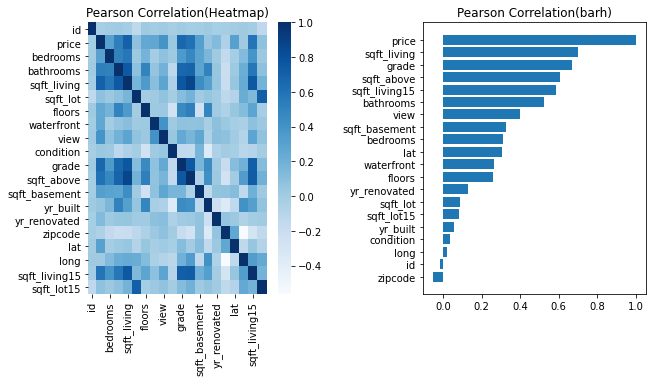

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
sns.heatmap(df_cor,ax=axes[0], cmap='Blues')
axes[0].set_title('Pearson Correlation(Heatmap)')
axes[1].barh(df_cor.sort_values('price',ascending=True).price.index,df_cor.sort_values('price',ascending=True).price)
axes[1].set_title('Pearson Correlation(barh)')
plt.show()
# feature를 하나 골라야 하니 상관계수가 가장 높은 sqft_living을 골랐습니다. 양의 상관관계를 갖고 있고, 
# 모델을 세우기 전 sqft_living이 증가했을 때 price의 가격도 증가할 것이라는 예측먼저 가져갈 수 있습니다.

#### Scatter로 Outlier확인 후 제거

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


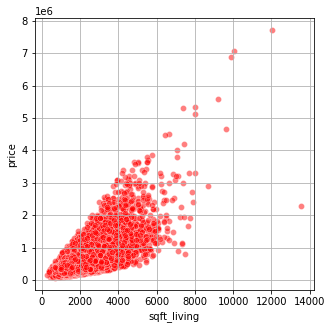

In [7]:
plt.figure(figsize=(5,5))
sns.scatterplot(df.sqft_living,df.price,color= 'red',alpha=0.5)
plt.grid()
plt.show() 
# 독립 : sqft // 종속 : price
# 양의 상관관계가 있음을 알 수 있다
# outlier가 보이는데, 14000에서 집을 싸게 산 경우가 있었다. 13000미만으로다시

(21612, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


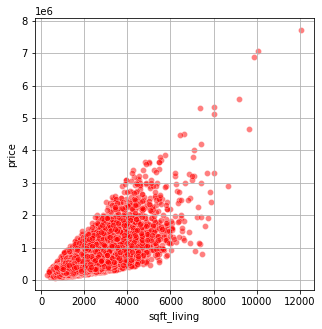

In [8]:
# 필요한 feature만 선택
# 타겟: price (가격)
df_1 = df[["price","sqft_living"]].copy()
df_1 = df_1[df_1['sqft_living'] <= 13000]
print(df_1.shape)
plt.figure(figsize=(5,5))
sns.scatterplot(df_1.sqft_living,df_1.price,color= 'red',alpha=0.5)
plt.grid()
plt.show() 

### 2) Scikit-Learn 라이브러리를 사용해 한 특성에 대한 선형회귀모델을 만들어 보세요.

#### 에러계산 함수

In [9]:
# 여러 지표 중 mae, rmse, mse를 참고하겠습니다.
import numpy as np
from sklearn.metrics import mean_absolute_error
import sklearn
def print_errors(y_true, y_hat):
  mae = mean_absolute_error(y_true, y_hat)
  rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
  mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
  print(f'mae : {mae:.2f}') # Mean Absolute Error 절대평균오차, 에러의 절대값 평균
  print(f'rmse : {rmse:.2f}') # Root Mean Squared Error 오차에 제곱해서 평균한 뒤에 루트씌운것
  print(f'mse : {mse:.2f}') # Mean Sqared Error 오차에 제곱한 것의 평균

#### train 과 test로 나누기 (Holdout Method)

In [10]:
from sklearn.model_selection import train_test_split
X = df_1[['sqft_living']]
y = df_1.price
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [11]:
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))

17289 4323
17289 4323


#### 기준모델

##### 기준값정하기

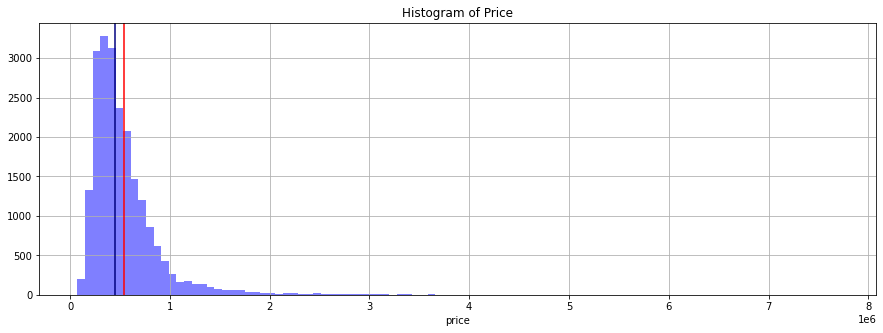

In [12]:
plt.figure(figsize = (15,5))
plt.hist(df_1.price, bins=100,color='blue',alpha=0.5)
plt.axvline(df_1.price.mean(),color ='red')
plt.axvline(df_1.price.median(),color ='navy')
plt.xlabel('price')
plt.title('Histogram of Price')
plt.grid()
plt.show() 
# 히스토그램을 보았을 때, 중앙값이 평균값보다 좀 더 Price를 잘 설명할 수 있다고 생각되어 중앙값을 기준으로 잡았습니다. 

##### 모델만들기

In [13]:
pred_median = [df_1.price.median()]*len(y_test)
print(df_1.price.median())
print(len(pred_median))

450000.0
4323


##### 시각화

No handles with labels found to put in legend.


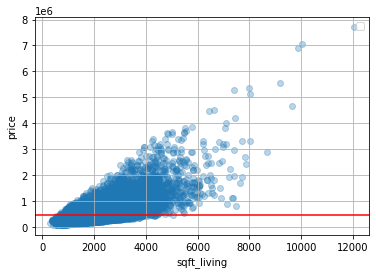

In [14]:
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.grid()
plt.scatter(x = df_1['sqft_living'], y = df_1['price'], alpha = 0.3)
plt.axhline(df_1.price.median(),color ='red')
plt.legend()
plt.show()
# 기준모델입니다. 빨간선이 중앙값입니다.

##### 모델의 오차

In [15]:
print_errors(y_test, pred_median) # 기준모델의 오차값이며 앞으로 뒤에 새로운 모델과 비교하여 성능을 평가하는 기준입니다.

mae : 217905.49
rmse : 362458.81
mse : 131376392145.99


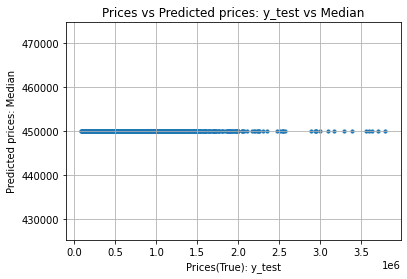

In [16]:
plt.scatter(y_test, pred_median, s=10) # 예측한 값(Median)과 실제값의 오차의 절대값을 산점도로 표현하면 다음과 같습니다. 
plt.xlabel("Prices(True): y_test")
plt.ylabel("Predicted prices: Median")
plt.title("Prices vs Predicted prices: y_test vs Median")
plt.grid()
plt.show()
# 값이 일정하기 때문에, 별로 안맞는 것을 볼 수 있습니다.

#### 선형회귀모델 만들기

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) #train에 모델을 fit해줍니다. X_train과 y_train을 기준으로 fit하는 것입니다. 
# 여기서 일반적으로 X를 대문자로 (행렬) y를 소문자로(벡터) 씁니다. # 모델은 아래와 같습니다. 
print(f'선형회귀모델 : y(price) = {int(model.coef_)}x - {abs(int(model.intercept_))}(절편)')

선형회귀모델 : y(price) = 284x - 51559(절편)


#### 시각화

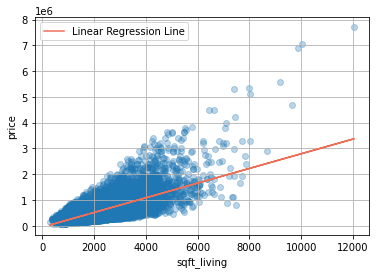

In [18]:
plt.scatter(x = df_1['sqft_living'], y = df_1['price'], alpha = 0.3)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(X_train, X_train*model.coef_ + model.intercept_, color = '#ee6f57', label = 'Linear Regression Line')
plt.legend()
plt.grid()
plt.show()
# 시각화하면 다음과 같이 선형으로 그려짐을 알 수 있습니다. 이는 각 실제y 값과의 오차가 가장 적은 방향으로 세워진 식입니다.

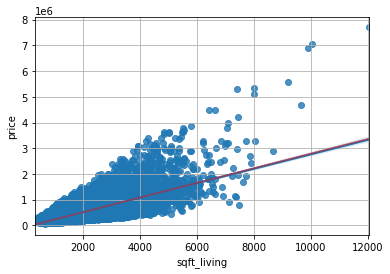

In [19]:
# regplot과 비교
sns.regplot(x = df_1['sqft_living'], y = df_1['price'])
plt.plot(X_train, X_train*model.coef_ + model.intercept_, color = 'red', alpha=0.4)
plt.grid()
plt.show()

#### 모델 test

In [20]:
y_hat_1 = model.predict(X_test) # 위에서 만든 모델 기반으로, 새로운 x값(훈련에 사용되진 x값,X_test)을가지고 y 예측값을 예측합니다 
y_true_1 = y_test

In [21]:
print('기준모델')
print_errors(y_test, pred_median)
print('선형회귀모델')
print_errors(y_true_1, y_hat_1) 
# 테스트한 결과는 다음과 같습니다. 기준모델보다는 나은 성능을 갖고있지만, 아직 오차가 매우 크므로 조치가 필요합니다

기준모델
mae : 217905.49
rmse : 362458.81
mse : 131376392145.99
선형회귀모델
mae : 172613.86
rmse : 254329.45
mse : 64683469489.42


#### 오차의 시각화

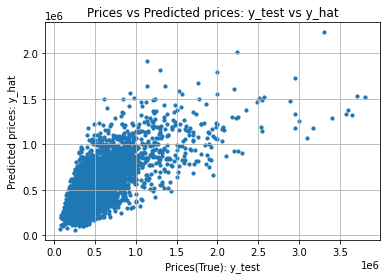

In [24]:
plt.scatter(y_test, y_hat_1, s=10) # 예측한 값과 실제 오차를 산점도로 표현하면 다음과 같습니다. 기준모델보다는 낫지만, 아직 퍼져있습니다.
plt.xlabel("Prices(True): y_test")
plt.ylabel("Predicted prices: y_hat")
plt.title("Prices vs Predicted prices: y_test vs y_hat")
plt.grid()
plt.show()

### 3) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.

#### 단일테이터 예측

In [25]:
# 임의의 데이터 하나를 넣었습니다.
new_data = 2200
new_data_1 = [[new_data]]
Y_pred = model.predict(new_data_1)
print(f"면적이 {new_data}sqare ft 인 주택의 예상 가격은 ${int(Y_pred):,}입니다.") 

면적이 2200sqare ft 인 주택의 예상 가격은 $574,623입니다.


#### Coefficient를 사용한 설명

In [26]:
print(f'선형회귀모델 : y(price) = {int(model.coef_)}x - {abs(int(model.intercept_))}(절편)')
print(f"독립변수(sqare ft of living area)가 1씩 상승할 때마다 예측치(price)는 {int(model.coef_)}씩 상승합니다.\n")
print(f"Sqare ft of living area가 0 일 때, Price 는 ${int(model.intercept_)} (intercept)입니다.")
print(f"면적이 {new_data}sqare ft 인 주택의 예상 가격은 ${int(Y_pred):,}입니다.") 

선형회귀모델 : y(price) = 284x - 51559(절편)
독립변수(sqare ft of living area)가 1씩 상승할 때마다 예측치(price)는 284씩 상승합니다.

Sqare ft of living area가 0 일 때, Price 는 $-51559 (intercept)입니다.
면적이 2200sqare ft 인 주택의 예상 가격은 $574,623입니다.


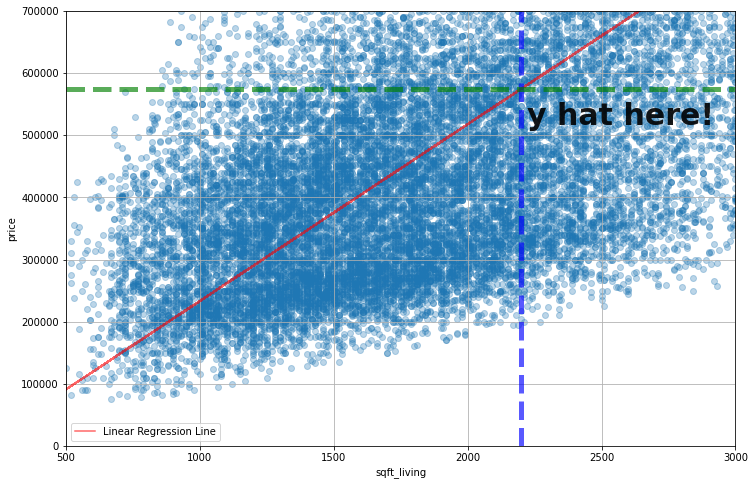

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(x = df_1['sqft_living'], y = df_1['price'], alpha = 0.3)
plt.xlabel('sqft_living'); plt.ylabel('price');
plt.xlim(500,3000);plt.ylim(0 ,700000);
plt.plot(X_train, X_train*model.coef_ + model.intercept_, color = 'red', label = 'Linear Regression Line', alpha = 0.6)
plt.axvline(2200,color ='b',linestyle='--', linewidth= 5, alpha = 0.65)
plt.axhline(Y_pred,color ='g',linestyle='--', linewidth= 5, alpha = 0.65)
plt.annotate('y hat here!',(2200+20,Y_pred*0.9), fontsize = 30, color='k', fontweight = 'bold',alpha= 0.9)
plt.legend() ; plt.grid() ; plt.show()

# x값 2200을 넣어서(파란선) y_hat을 얻을 수 있습니다.(초록선)
# 이때 y_hat이 우리의 예측값입니다.

### 4) 다른 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.

#### 탐색

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

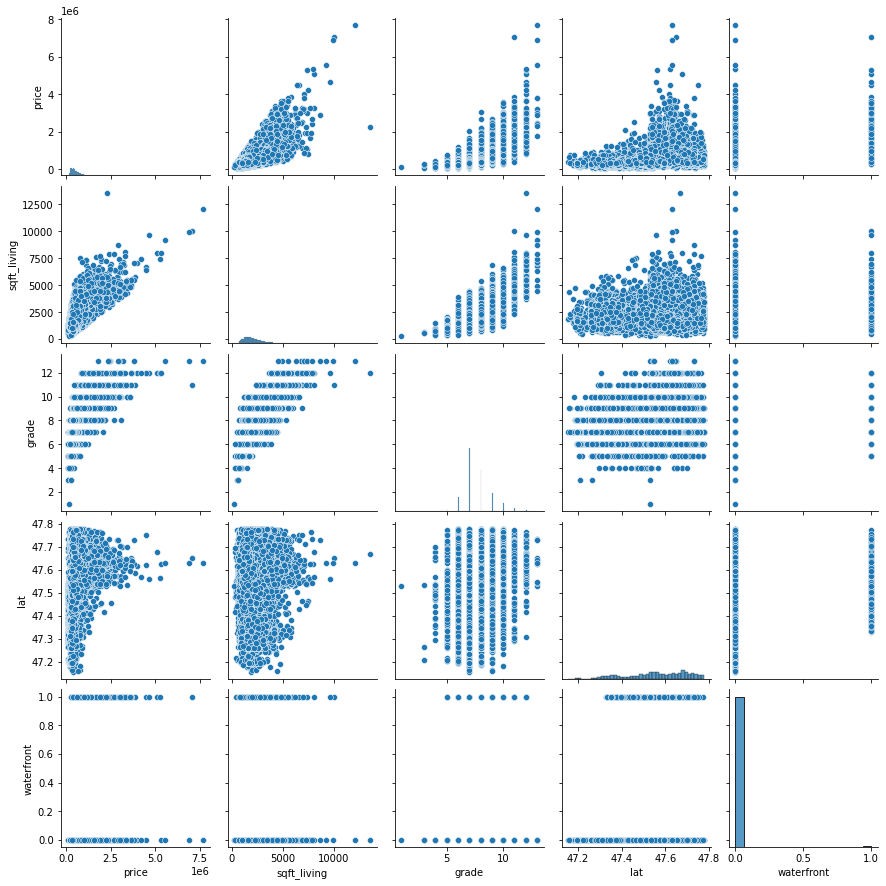

In [30]:
sns.pairplot(data = df[['price','sqft_living','grade','lat','waterfront']]) 
# 뻔히 양의 상관관계를 갖는것보다 서로 관계가 덜 한 feature를 고르고싶었습니다.

Living 면적이 크면 다른 면적도 크며 상관관계가 짙게보입니다. (sqft_above등) 그래서 lat을 feature로 선정했습니다.

#### 선택, 모형만들기

In [31]:
df_2 = df[['price','lat']].copy()
df_2.head()

,price,lat
0,221900.0,47.5112
1,538000.0,47.7210
2,180000.0,47.7379
3,604000.0,47.5208
4,510000.0,47.6168


In [32]:
# X와 y값 만들어주고 train, test로 나누기
X_2 = df_2[['lat']]
y_2 = df_2.price
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(X_2,y_2, test_size = 0.2)

In [33]:
model = LinearRegression()
model.fit(X_2_train,y_2_train) #train에 모델을 fit해줍니다. 
print(f'선형회귀모델 : y(price) = {int(model.coef_)}x - {abs(int(model.intercept_))}(절편)')
# 모델은 다음과 같습니다.

선형회귀모델 : y(price) = 810162x - 37992063(절편)


In [34]:
print(len(X_2_train),len(X_2_test))
print(len(y_2_train),len(y_2_test))

17290 4323
17290 4323


#### 시각화

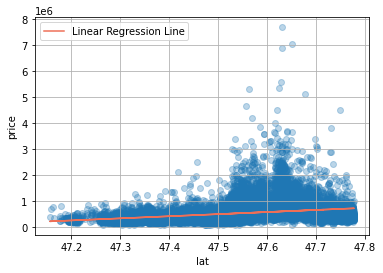

In [35]:
plt.scatter(x = df_2['lat'], y = df_2['price'], alpha = 0.3)
plt.xlabel('lat')
plt.ylabel('price')
plt.plot(X_2_train, X_2_train*model.coef_ + model.intercept_, color = '#ee6f57', label = 'Linear Regression Line')
plt.legend()
plt.grid()
plt.show()

#### 모델 test

In [36]:
model.fit(X_2_train,y_2_train) # fit해서 모델을 만들었습니다.
y_hat_2 = model.predict(X_2_test) # test로 y를 예측합니다.
y_true_2 = y_2_test # 비교할 실제값

In [37]:
print_errors(y_true_2,y_hat_2) # 오차는 다음과 같습니다.

mae : 212936.56
rmse : 346876.95
mse : 120323621787.09


#### 오차의 시각화

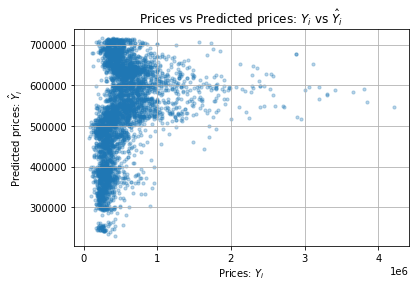

In [38]:
plt.scatter(y_true_2, y_hat_2, s=10, alpha=0.3) # 역시 제대로 예측하는 것은 힘들어보입니다
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
plt.show()

#### 두 모델 비교

In [40]:
print('sqft_living 단순회귀')
print_errors(y_true_1, y_hat_1) 
print('\nlat 단순회귀')
print_errors(y_true_2,y_hat_2)
print('\nsqft_living이 오차가 더 작습니다 ! sqft_living를 회귀계수로한 모델이 성능이 더 좋습니다')

sqft_living 단순회귀
mae : 172613.86
rmse : 254329.45
mse : 64683469489.42

lat 단순회귀
mae : 212936.56
rmse : 346876.95
mse : 120323621787.09

sqft_living이 오차가 더 작습니다 ! sqft_living를 회귀계수로한 모델이 성능이 더 좋습니다





## 🔥추가목표



### 5) 특성 두개를 동시에 사용해서 선형회귀모델을 만들어 보세요.


#### 탐색

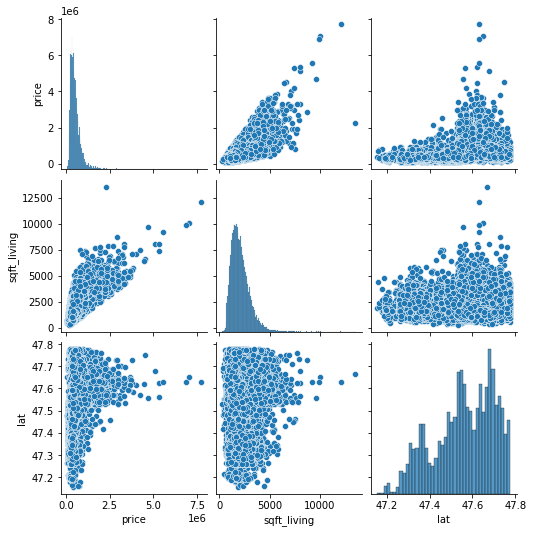

In [41]:
df_3 = df[['price','sqft_living','lat']].copy()
sns.pairplot(df_3) # 위 두 모델에서 사용한 feature를 사용했습니다.

#### 모형만들기

In [42]:
X = df_3[['sqft_living','lat']]
y = df_3.price
X_3_train,X_3_test,y_3_train,y_3_test = train_test_split(X,y, test_size = 0.2)

In [43]:
model = LinearRegression()
model.fit(X_3_train,y_3_train)
print(f'선형회귀모델 : y(price) = {int(model.coef_[0])}x1 + {int(model.coef_[1])}x2 - {abs(int(model.intercept_))}(절편)')

선형회귀모델 : y(price) = 280x1 + 715812x2 - 34086614(절편)


#### 시각화

In [44]:
import plotly.express as px
import plotly.graph_objs as go
import itertools
fig = px.scatter_3d(df_3, x='sqft_living', y='lat', z='price', opacity=0.2)
x_axis = np.linspace(df_3['sqft_living'].min(), df_3['sqft_living'].max(), 15)
y_axis = np.linspace(df_3['lat'].min(), df_3['lat'].max(), 15)
z_axis = model.predict(list(itertools.product(x_axis, y_axis))).reshape(15, 15).T
fig.add_trace(go.Surface(x=x_axis, y=y_axis, z=z_axis, colorscale='plasma'))
fig.show()
# 3차원이므로, 우리가 원하는 선형모델은 아래와 같습니다.

#### 모델 test

In [45]:
y_hat_3 = model.predict(X_3_test)
y_true_3 = y_3_test

In [46]:
print('sqft_living만을 사용한 단순회귀')
print_errors(y_true_1,y_hat_1)
print('\nlat만을 사용한 단순회귀')
print_errors(y_true_2,y_hat_2)
print('\nsqft_living과 lat를 같이 사용한 다중회귀')
print_errors(y_true_3,y_hat_3)
print('\n단순회귀보다 2개를 같이 사용한 회귀모델이 성능이 더 좋았습니다 !')

sqft_living만을 사용한 단순회귀
mae : 172613.86
rmse : 254329.45
mse : 64683469489.42

lat만을 사용한 단순회귀
mae : 212936.56
rmse : 346876.95
mse : 120323621787.09

sqft_living과 lat를 같이 사용한 다중회귀
mae : 150723.24
rmse : 224571.67
mse : 50432433000.37

단순회귀보다 2개를 같이 사용한 회귀모델이 성능이 더 좋았습니다 !


#### 오차의 시각화

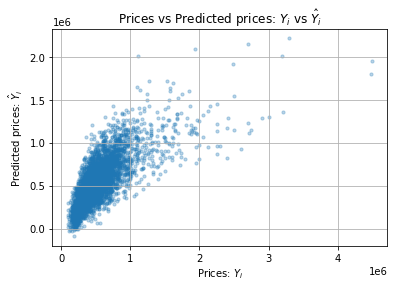

In [47]:
plt.scatter(y_true_3, y_hat_3, s=10, alpha=0.3) # 다른 방법을 쓰면 좀 더 모을 수 있을 것 같습니다.
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
plt.show()

#### 설명

In [48]:
model.fit(X_3_train,y_3_train)
new_data = [2200, 47]
X_mul = [new_data]
y_mul_pred = model.predict(X_mul)
print(f'새로운 데이터로 [sqft_living : {X_mul[0][0]:,}, lat : {X_mul[0][1]:}]가 주어졌을 때\nHouse Price는 ${int(y_mul_pred[0]):,.0f}로 예측한다')
print(f'\nsqft_living이 1 증가 할 수록 ${int(model.coef_[0]):,}가 증가한다.')
print(f'lat이 1 증가 할 수록 ${int(model.coef_[1]):,}가 증가한다.')

새로운 데이터로 [sqft_living : 2,200, lat : 47]가 주어졌을 때
House Price는 $174,472로 예측한다

sqft_living이 1 증가 할 수록 $280가 증가한다.
lat이 1 증가 할 수록 $715,812가 증가한다.



### 6) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

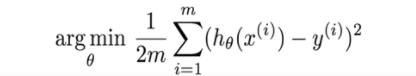

In statistics, ordinary least squares is a type of linear least squares method for estimating the unknown parameters in a linear regression model.- wiki

OLS는 최소제곱법입니다.


우리는 y hat이라는 예측치를 가지고 싶습니다. 그래서 가설함수를 세웠는데 그 가설함수는 y = b0 + b1x1 + b2x2 ,,, 와 같은 식으로 세워집니다. (선이기 때문에)


실제값과 가설함수의 차이를 Cost Function(Loss Function)이라고 부릅니다. 선형회귀의 목적은  Cost Function을 최소화하는데 있습니다. 이를 행렬, 편미분으로 찾을 수 있습니다((normal equation) 수학적내용은 생략하겠습니다.) 

식에서 sum 괄호안의 의미는, 우리가 구할 가설함수에서 x를 대입한 값(즉 예측값)과 실제 y의 값의 차입니다. 제곱을 하는 이유는 음수와 양수가 만났을 때, 상쇄되지 않게 하기 위함입니다. (위 식에서 m은 데이터의 갯수이므로 상수이기 때문에 설명 생략하겠습니다.)


그냥 쉽게말하면, OLS란 아래 그림에서 빨감점과 까만 선의 이 (흰색 선)을 제곱해서 합한 것입니다. 그리고 우리는 이 차이를 최소화 시킵니다.

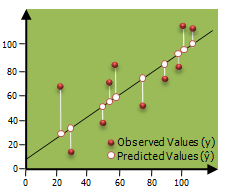